# Deep Computer Vision

In this guide we will learn how to peform image classification and object detection/recognition using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

**Concepts**:
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

# Convolutional Neural Networks

### Dataset

The problem we will consider here is classifying 10 different everyday objects. The dataset contains 60.000 32x32 color images with 6000 images of each class.

In [1]:
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Load and split dataset
(data_train, y_train), (data_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 44s 0us/step


In [4]:
data_train.shape

(50000, 32, 32, 3)

#### Preprocessing the data

In [8]:
# Normalize pixels values to be between 0 and 1
data_train = data_train / 255.0
data_test = data_test / 255.0

In [9]:
# Build array of label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

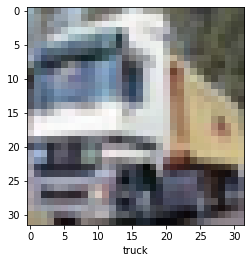

In [22]:
# Look at a x image
plt.figure() # Make a figure
plt.imshow(data_train[1], cmap=plt.cm.binary) # Show the image
plt.xlabel(class_names[y_train[1][0]])
plt.show()

### CNN Architecture
#### Creating the model

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3) ))
model.add(keras.layers.MaxPool2D( (2,2) ))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D( (2,2) ))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Adding Dense Layers
So far, we have just completed the convolutional base. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [26]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

So we've combined the convolutional base with the Classifier to essentially extract the features and then look at the features and predict the actual object

### Training the model

In [30]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
            
# Training
history = model.fit(data_train, y_train, epochs=6, validation_data=(data_test, y_test))

C:\Users\Jhon\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/6
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5543 - accuracy: 0.4316 - val_loss: 1.2586 - val_accuracy: 0.5494
Epoch 2/6
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1794 - accuracy: 0.5830 - val_loss: 1.1493 - val_accuracy: 0.5836
Epoch 3/6
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0368 - accuracy: 0.6365 - val_loss: 1.0363 - val_accuracy: 0.6324
Epoch 4/6
1563/1563 [==============================] - 34s 21ms/step - loss: 0.9419 - accuracy: 0.6683 - val_loss: 0.9874 - val_accuracy: 0.6503
Epoch 5/6
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8752 - accuracy: 0.6952 - val_loss: 0.9760 - val_accuracy: 0.6631
Epoch 6/6
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8185 - accuracy: 0.7129 - val_loss: 0.9202 - val_accuracy: 0.6812


### Evaluating the model

In [31]:
test_loss, test_acc = model.evaluate(data_test, y_test, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.9202 - accuracy: 0.6812
Test accuracy: 0.6812000274658203


## Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

### 1. Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this.
Example of data augmentation:

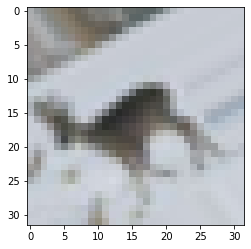

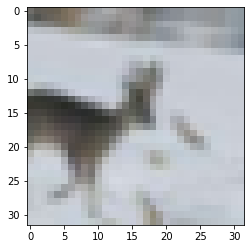

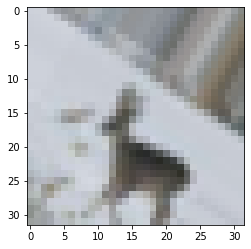

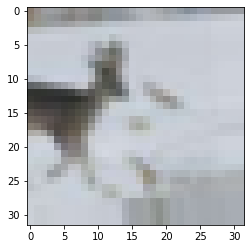

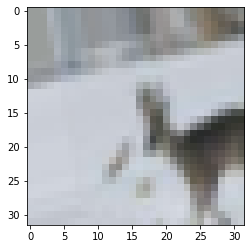

In [35]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = data_train[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

### 2. Pretrained Models

### Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.